In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [13]:
x_train['Age_imputed'][x_train['Age'].isnull()]

650   NaN
181   NaN
334   NaN
28    NaN
783   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_imputed, Length: 124, dtype: float64

In [17]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values



array([34.  , 25.  , 28.  , 18.  , 29.  , 16.  , 24.  , 22.  , 29.  ,
       28.  , 40.  , 32.  , 47.  , 35.  , 40.  , 60.  , 26.  , 16.  ,
       15.  , 33.  , 22.  , 35.  , 26.  , 40.5 , 28.  , 40.  , 74.  ,
       51.  ,  1.  , 25.  , 33.  , 32.  , 20.  , 29.  , 23.  , 20.  ,
       16.  ,  0.67, 54.  , 40.  , 45.  , 48.  , 24.  , 30.  , 22.  ,
       16.  , 19.  , 23.  , 36.  , 41.  ,  4.  , 59.  , 30.  , 14.  ,
       31.  ,  4.  , 18.  , 39.  , 29.  , 37.  , 31.  ,  7.  , 32.  ,
       60.  , 25.  , 31.  , 25.  , 18.  , 21.  , 56.  , 19.  , 36.  ,
        4.  , 24.  ,  3.  , 45.  , 50.  ,  2.  , 19.  , 48.  , 42.  ,
       27.  , 36.  , 56.  , 29.  , 44.  , 21.  , 29.  , 21.  , 16.  ,
       24.  , 39.  , 64.  , 49.  , 47.  , 18.  , 50.  , 21.  , 45.5 ,
       38.  , 24.  , 25.  , 18.  , 16.  , 33.  , 36.  , 24.  , 19.  ,
       22.  , 28.5 , 17.  , 34.  , 22.  , 45.  , 23.  , 35.  , 34.  ,
        3.  , 20.  , 33.  , 35.  , 32.5 , 38.  , 22.  ])

In [19]:
# random number fil hoye aa 148 nan values vich
x_train['Age_imputed'][x_train['Age'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\hp\AppData\Local\Temp\ipykernel_7504\2058349149.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_imputed'][x_test['Age'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [21]:
x_train.sample(5)

,Age,Fare,Age_imputed
320,22.0,7.2500,22.0
245,44.0,90.0000,44.0
638,41.0,39.6875,41.0
351,NaN,35.0000,20.0
397,46.0,26.0000,46.0


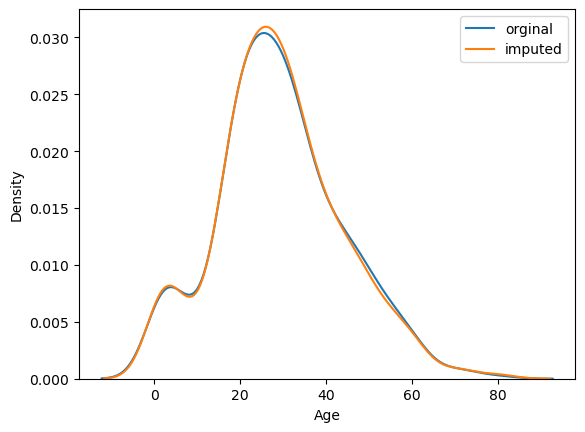

In [ ]:
sns.kdeplot(x_train['Age'],label='orginal')
sns.kdeplot(x_train['Age_imputed'],label='imputed')
plt.legend(loc='best')
plt.show()

# distribution same rahegi so ena fark linear models te nhi payega  but tree vale te payega

In [ ]:
x_train['Age'].var(),x_train['Age_imputed'].var()
# variance ch kush ena fark penda nhi aa

(211.95188064643307, 211.18608953977474)

In [31]:
x_train.cov()
# cov ch thoda bohgt farq penda if you compare both cols to the fare

,Age,Fare,Age_imputed
Age,211.951881,75.274254,211.951881
Fare,75.274254,2603.792658,76.630635
Age_imputed,211.951881,76.630635,211.186090


<Axes: >

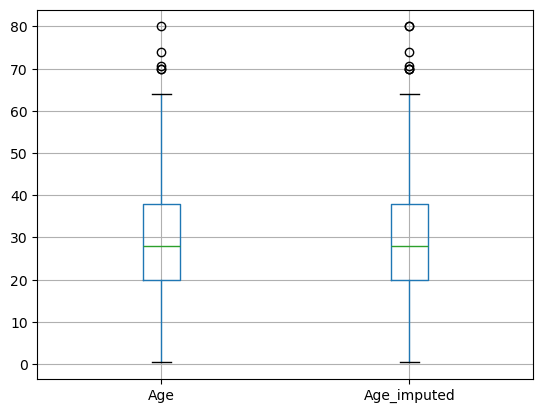

In [ ]:
x_train[['Age','Age_imputed']].boxplot()
# outlier te vi kush ena fark penda nhi aa

In [ ]:
for idx,observation in x_train.iterrows():
    if pd.isnull(observation['Age']):
        sampled_value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

        # this code function is fill the random number on nan accordind to fare means having same fare will have same random number not always change

In [61]:
x_train.head(5)

,Age,Fare,Age_imputed
445,4.0,81.8583,4.0
650,NaN,7.8958,34.0
172,1.0,11.1333,1.0
450,36.0,27.7500,36.0
314,43.0,26.2500,43.0


#  now for categorical data


In [62]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [63]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [64]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [65]:
x=data
y=data['SalePrice']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [67]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [69]:
x_train.sample(4)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
683,TA,TA,285000,TA,TA
520,NaN,NaN,106250,NaN,NaN
1079,NaN,TA,126000,TA,NaN
681,NaN,TA,159434,TA,NaN


In [75]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values



C:\Users\hp\AppData\Local\Temp\ipykernel_7504\1331533179.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].is

In [76]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
104,TA,TA,169500,TA,TA
1185,NaN,TA,104900,TA,Ex
786,NaN,TA,139000,TA,TA
379,TA,TA,179000,TA,TA
1129,NaN,TA,140000,TA,TA
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [81]:
# hun ethe appa check karange ki koi imputation karn to baad freq of values te farq teni pe reya na

temp=pd.concat([
    x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts() / len(x_train)
],axis=1)

temp.columns=['original','imputed']

In [82]:
temp

,original,imputed
TA,0.951245,0.951076
Fa,0.036307,0.035225
Gd,0.010373,0.010763
Po,0.001037,0.000978
Ex,0.001037,0.001957


In [83]:

temp=pd.concat([
    x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts() / len(x_train)
],axis=1)

temp.columns=['original','imputed']

In [84]:
temp

,original,imputed
Gd,0.499048,0.500000
TA,0.411429,0.410959
Fa,0.036190,0.035225
Po,0.028571,0.028376
Ex,0.024762,0.025440


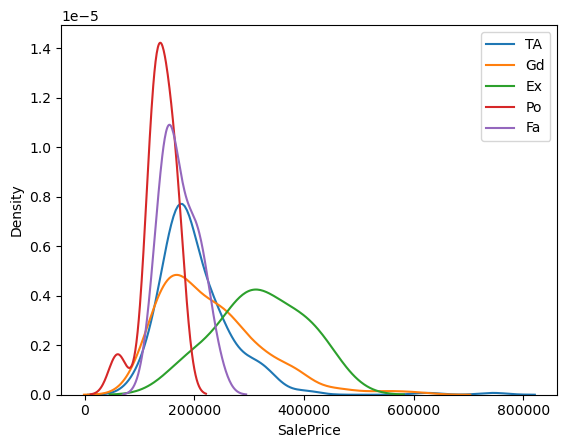

In [88]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],label=category)
    plt.legend()
plt.show()    

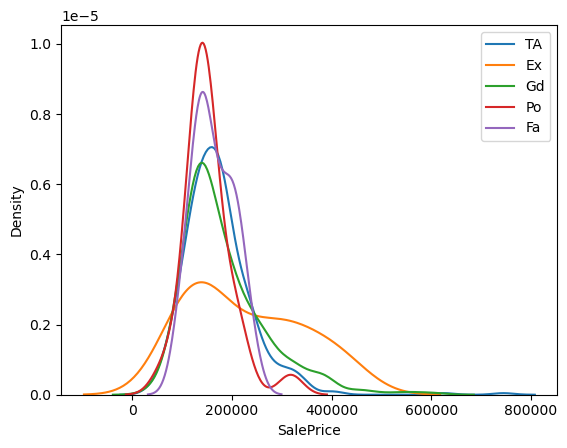

In [ ]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],label=category)
    plt.legend()
plt.show()      
# distribution ch kafi change aya becuase kafi missing values si